# LING583 Final Project

## Social media hate speech sentimental analysis

#### Dataset Link : https://huggingface.co/datasets/ucberkeley-dlab/measuring-hate-speech

In [138]:
import datasets 
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()

Found cached dataset parquet (/Users/tejapeddi/.cache/huggingface/datasets/ucberkeley-dlab___parquet/ucberkeley-dlab--measuring-hate-speech-c32713cabe528196/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [139]:
df.head(5)

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [140]:
data = df[['text','sentiment','hatespeech', 'hate_speech_score']]

In [141]:
data.head(20)

,text,sentiment,hatespeech,hate_speech_score
0,Yes indeed. She sort of reminds me of the elde...,0.0,0.0,-3.90
1,The trans women reading this tweet right now i...,0.0,0.0,-6.52
2,Question: These 4 broads who criticize America...,4.0,2.0,0.36
3,It is about time for all illegals to go back t...,2.0,0.0,0.26
4,For starters bend over the one in pink and kic...,4.0,2.0,1.54
5,Sounds like the kinda wholsesome life I'd die ...,1.0,0.0,-4.93
6,Who the fuck is this insignificant simple mind...,4.0,2.0,0.17
7,Fuck off you insufferable retarded faggot.,4.0,2.0,2.08
8,"OMG! The EGO's of these young, young, inexperi...",4.0,0.0,-0.66
9,"Worthless whore, these tits with look nice wit...",4.0,2.0,-0.38


### Preprocessing the text column 

In [208]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#nltk.download('stopwords')
#nltk.download('punkt')

# Function to preprocess the text
def preprocess_text(text):
    # Text Cleaning
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)

    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword Removal
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a single string
    processed_text = " ".join(tokens)

    return processed_text


# Apply text preprocessing on the 'text' column
data['clean_text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejapeddi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tejapeddi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/69/8hw226bd4_q74hzlmqh8t6sh0000gn/T/ipykernel_74070/2468516833.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['text'].apply(preprocess_text)


In [209]:
data.head(5)

,text,sentiment,hatespeech,hate_speech_score,label,doc,clean_text
0,Yes indeed. She sort of reminds me of the elde...,0.0,0.0,-3.90,non_hate_speech,"(Yes, indeed, ., She, sort, of, reminds, me, o...",yes indeed sort reminds elder lady played part...
1,The trans women reading this tweet right now i...,0.0,0.0,-6.52,non_hate_speech,"(The, trans, women, reading, this, tweet, righ...",trans women reading tweet right beautiful
2,Question: These 4 broads who criticize America...,4.0,2.0,0.36,hate_speech,"(Question, :, These, 4, broads, who, criticize...",question 4 broads criticize america country fl...
3,It is about time for all illegals to go back t...,2.0,0.0,0.26,non_hate_speech,"(It, is, about, time, for, all, illegals, to, ...",time illegals go back country origin keep free...
4,For starters bend over the one in pink and kic...,4.0,2.0,1.54,hate_speech,"(For, starters, bend, over, the, one, in, pink...",starters bend one pink kick ass pussy get tast...


In [142]:
unique_values = data['hatespeech'].unique()
print(unique_values)

[0. 2. 1.]


#### Classifying hatespeech ='2','1' into hate_speech label and hatespeech= '0' into non_hate_speech

In [210]:
import pandas as pd

# Create a new column 'classification' to store the classification results
data['label'] = data['hatespeech'].apply(lambda x: 'hate_speech' if x >= 1 else 'non_hate_speech')


/var/folders/69/8hw226bd4_q74hzlmqh8t6sh0000gn/T/ipykernel_74070/4001044798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['hatespeech'].apply(lambda x: 'hate_speech' if x >= 1 else 'non_hate_speech')


In [211]:
data.head(5)

,text,sentiment,hatespeech,hate_speech_score,label,doc,clean_text
0,Yes indeed. She sort of reminds me of the elde...,0.0,0.0,-3.90,non_hate_speech,"(Yes, indeed, ., She, sort, of, reminds, me, o...",yes indeed sort reminds elder lady played part...
1,The trans women reading this tweet right now i...,0.0,0.0,-6.52,non_hate_speech,"(The, trans, women, reading, this, tweet, righ...",trans women reading tweet right beautiful
2,Question: These 4 broads who criticize America...,4.0,2.0,0.36,hate_speech,"(Question, :, These, 4, broads, who, criticize...",question 4 broads criticize america country fl...
3,It is about time for all illegals to go back t...,2.0,0.0,0.26,non_hate_speech,"(It, is, about, time, for, all, illegals, to, ...",time illegals go back country origin keep free...
4,For starters bend over the one in pink and kic...,4.0,2.0,1.54,hate_speech,"(For, starters, bend, over, the, one, in, pink...",starters bend one pink kick ass pussy get tast...


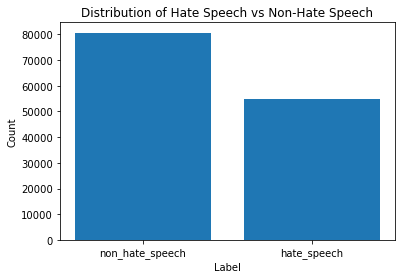

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has a 'label' column

# Count the occurrences of each label
label_counts = data['label'].value_counts()

# Plot the bar graph
plt.bar(label_counts.index, label_counts.values)

# Add labels and title to the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech vs Non-Hate Speech')

# Show the plot
plt.show()


## Wordcloud visualization

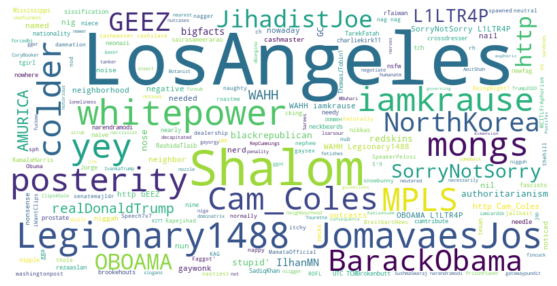

In [213]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'text' and 'label' columns

# Filter the DataFrame to include only 'hate-speech' rows
hate_speech_df = data[data['label'] == 'hate_speech']

# Concatenate the text from the 'text' column of hate_speech_df
all_text = ' '.join(hate_speech_df['text'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(w for w in all_text.split() if not w.startswith('n'))).generate(all_text)
##removing some racial words

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


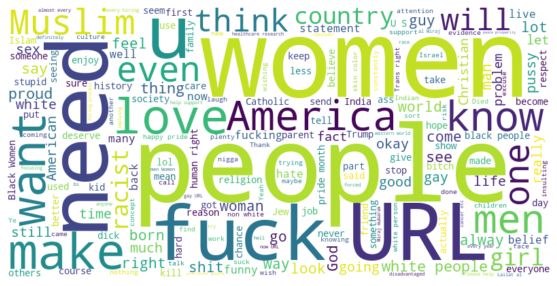

In [214]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'text' and 'label' columns

# Filter the DataFrame to include only 'hate-speech' rows
hate_speech_df = data[data['label'] == 'non_hate_speech']

# Concatenate the text from the 'text' column of hate_speech_df
all_text = ' '.join(hate_speech_df['text'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [215]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [216]:
train, test = train_test_split(
    data, test_size=0.3, stratify=data["label"], random_state=619
)

In [217]:
dummy = DummyClassifier()
dummy.fit(train["clean_text"], train["label"])
print(accuracy_score(test["label"], dummy.predict(test["clean_text"])))

0.5947574200211474


## VADER

In [218]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [219]:
analyzer = SentimentIntensityAnalyzer()


def get_sentiment(text):
    return analyzer.polarity_scores(text)["compound"]


train["vader"] = train["text"].apply(get_sentiment)
test["vader"] = test["text"].apply(get_sentiment)

In [220]:
import numpy as np
theta = np.linspace(-1.0, 1.0, 50)
compound = [
    accuracy_score((train["vader"] > t), (train["label"] == "non_hate_speech")) for t in theta
]

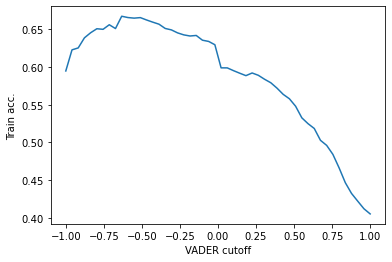

In [221]:
plt.plot(theta, compound)
plt.xlabel("VADER cutoff")
plt.ylabel("Train acc.")
plt.show()

In [222]:
thresh = theta[np.argmax(compound)]

In [223]:
accuracy_score((test["vader"] > thresh), (test["label"] == "non_hate_speech"))

0.6618880173113335

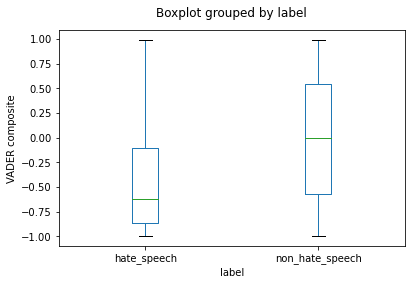

In [224]:
train.boxplot("vader", by="label", grid=False, showfliers=False)
plt.ylabel("VADER composite")
plt.title("")
plt.show()

### Positive/negative difference APPROACH


In [225]:
def get_diff(text):
    scores = analyzer.polarity_scores(text)
    return scores["pos"] - scores["neg"]


train["vader_diff"] = train["text"].apply(get_diff)
test["vader_diff"] = test["text"].apply(get_diff)

Text(0, 0.5, 'Train acc.')

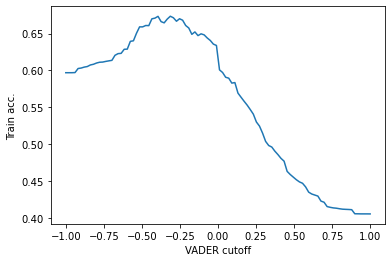

In [226]:
theta = np.linspace(-1.0, 1.0, 100)
diff = [
    accuracy_score((train["vader_diff"] > t), (train["label"] == "non_hate_speech"))
    for t in theta
]

plt.plot(theta, diff)
plt.xlabel("VADER cutoff")
plt.ylabel("Train acc.")

In [227]:
thresh = theta[np.argmax(diff)]
thresh

-0.31313131313131304

In [228]:
accuracy_score((test["vader_diff"] > thresh), (test["label"] == "non_hate_speech"))

0.6686748469274842

In [229]:
print(classification_report((test["vader_diff"] > thresh), test["label"] == "non_hate_speech"))

              precision    recall  f1-score   support

       False       0.48      0.62      0.54     12910
        True       0.80      0.69      0.74     27757

    accuracy                           0.67     40667
   macro avg       0.64      0.65      0.64     40667
weighted avg       0.70      0.67      0.68     40667



## SGDClassifier baseline

In [230]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

In [231]:
import spacy

nlp = spacy.load(
    "en_core_web_sm",
    exclude=["tagger", "parser", "ner", "lemmatizer", "attribute_ruler"],
)


def tokenize(text):
    doc = nlp.tokenizer(text)
    return [t.norm_ for t in doc if not (t.is_space or t.is_punct or t.like_num)]

In [232]:
train1, test1 = train_test_split(
    data, test_size=0.3, stratify=data["label"], random_state=619
)


In [233]:
train1["tokens"] = train1["text"].apply(tokenize)
test1["tokens"] = test1["text"].apply(tokenize)

In [234]:
baseline = make_pipeline(
    CountVectorizer(analyzer=identity), TfidfTransformer(), SGDClassifier()
)

In [235]:
baseline.fit(train1["tokens"], train1["label"])
baseline.score(test1["tokens"], test1["label"])

0.7959524921926869

## MultinomialNB

In [236]:
from sklearn.naive_bayes import MultinomialNB

mnbpipeline = make_pipeline(
    CountVectorizer(analyzer=identity), TfidfTransformer(), MultinomialNB()
)

In [237]:
mnbpipeline.fit(train1["tokens"], train1["label"])
mnbpipeline.score(test1["tokens"], test1["label"])

0.7876902648338948

In [238]:
#ERRORS

In [239]:
predicted = baseline.predict(test1["tokens"])

In [240]:
error = test[predicted != test1["label"]]

In [177]:
error[error["label"] == "hate_speech"]["text"].iloc[0]

"Let's call it heteroflexible."

In [178]:
error[error["label"] == "non_hate_speech"]["text"].iloc[0]

"That's no excuse for stealing other people's technology and research and intellectual property You're all a bunch of human cockroaches is what you are And your food is disgusting on top of that you assholes will eat anything to the point where you'll make any creature go extinct because of your fucking appetites You chinks are determined to eat every Pangolin until they are all wiped off the earth"

## Syntactically augumented classification

In [179]:
#!python -m spacy download en_core_web_lg

import spacy
from spacy import displacy
from spacy.tokens import DocBin

nlp = spacy.load("en_core_web_lg", exclude=["ner"])

In [180]:
docs = DocBin(docs=nlp.pipe(tqdm(data['text']), n_process=4))
docs.to_disk('parsed.docbin')

  0%|          | 0/135556 [00:00<?, ?it/s]

In [181]:
docs = DocBin().from_disk("parsed.docbin")
data["doc"] = list(docs.get_docs(nlp.vocab))

/var/folders/69/8hw226bd4_q74hzlmqh8t6sh0000gn/T/ipykernel_74070/319695185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["doc"] = list(docs.get_docs(nlp.vocab))


In [182]:
train2, test2 = train_test_split(
    data, test_size=0.3, stratify=data["label"], random_state=619
)

In [183]:
from spacy.tokens import Token

Token.set_extension("neg", default=False, force=True)

In [184]:
def simple_negation(doc):
    for tok in doc:
        tok._.neg = False
    for tok in doc:
        if tok.dep_ == "neg":
            tok.head._.neg = True
    return doc


def add_not(tok):
    if tok._.neg:
        return "NOT:" + tok.norm_
    else:
        return tok.norm_


def tokenize_not(negator):
    def tokenize(doc):
        return [add_not(t) for t in negator(doc)]

    return tokenize

In [185]:
sample = nlp("Biden is not good and does not care.")
displacy.render(sample)

In [186]:
tokenizer = tokenize_not(simple_negation)
tokenizer(sample)

['biden', 'NOT:is', 'not', 'good', 'and', 'does', 'not', 'NOT:care', '.']

In [187]:
m1 = make_pipeline(
    CountVectorizer(
        preprocessor=identity,
        tokenizer=tokenize_not(simple_negation),
        token_pattern=None,
    ),
    TfidfTransformer(),
    SGDClassifier(random_state=619),
)
m1.fit(train2["doc"], train2["label"])
m1.score(test2["doc"], test2["label"])

0.7953131531708757

In [188]:
m1_pred = m1.predict(test2["doc"])
print(classification_report(test2["label"], m1_pred))

                 precision    recall  f1-score   support

    hate_speech       0.82      0.63      0.71     16480
non_hate_speech       0.78      0.91      0.84     24187

       accuracy                           0.80     40667
      macro avg       0.80      0.77      0.78     40667
   weighted avg       0.80      0.80      0.79     40667



In [189]:
def print_top_feats(M, k=0):
    V = M.named_steps["countvectorizer"].get_feature_names_out()
    coef = M.named_steps["sgdclassifier"].coef_[0]
    order = coef.argsort()
    for w1, w2 in zip(order[-k:][::-1], order[:k]):
        print(f"{V[w1]:20s} {coef[w1]:7.3f} | {V[w2]:20s} {coef[w2]:7.3f}")

In [190]:
print_top_feats(m1, 50)

if                     0.881 | niggas                -5.938
women                  0.872 | faggot                -5.826
men                    0.841 | nigga                 -5.535
love                   0.712 | niggers               -4.372
girls                  0.687 | nigger                -4.292
girl                   0.672 | fag                   -4.215
woman                  0.651 | faggots               -3.961
guys                   0.576 | cunt                  -3.440
females                0.571 | slut                  -3.365
church                 0.570 | retard                -3.360
lick                   0.536 | bitch                 -3.311
americans              0.533 | whore                 -3.310
haircuts               0.531 | fags                  -3.308
immigration            0.529 | die                   -2.933
black                  0.526 | bitches               -2.618
NOT:is                 0.525 | fucking               -2.535
happy                  0.517 | retards  

In [191]:
def negify(tok):
    tok._.neg = True
    for child in tok.children:
        negify(child)


def negate_comps(doc):
    for tok in doc:
        tok._.neg = False
    for tok in doc:
        if tok.dep_ == "neg":
            tok.head._.neg = True
            for right_tok in tok.head.rights:
                if right_tok.dep_ in ["acomp", "advmod", "dobj", "prep", "xcomp"]:
                    negify(right_tok)
    return doc

In [192]:
tokenizer = tokenize_not(negate_comps)
tokenizer(sample)

['biden', 'NOT:is', 'not', 'NOT:good', 'and', 'does', 'not', 'NOT:care', '.']

In [193]:
m2 = make_pipeline(
    CountVectorizer(
        preprocessor=identity, tokenizer=tokenize_not(negate_comps), token_pattern=None
    ),
    TfidfTransformer(),
    SGDClassifier(alpha=1e-4, random_state=1),
)
m2.fit(train2["doc"], train2["label"])
m2.score(test2["doc"], test2["label"])

0.7935672658420833

In [194]:
print_top_feats(m2, 50)

men                    0.883 | faggot                -5.859
women                  0.844 | niggas                -5.838
if                     0.840 | nigga                 -5.519
love                   0.733 | nigger                -4.294
girls                  0.715 | niggers               -4.257
woman                  0.675 | fag                   -4.209
girl                   0.656 | faggots               -3.868
church                 0.588 | cunt                  -3.447
immigration            0.556 | slut                  -3.317
lady                   0.554 | bitch                 -3.313
guys                   0.546 | whore                 -3.249
females                0.545 | retard                -3.239
haircuts               0.529 | fags                  -3.234
americans              0.529 | die                   -2.930
black                  0.528 | bitches               -2.614
lick                   0.524 | fucking               -2.544
happy                  0.522 | retards  

In [195]:
def mod_tokenizer(doc):
    doc = negate_comps(doc)
    toks = [add_not(tok) for tok in doc]
    toks = toks + [
        add_not(t.head) + "_" + add_not(t) for t in doc if t.dep_ in ["amod", "advmod"]
    ]
    return toks

In [196]:
mod_tokenizer(sample
             )

['biden', 'NOT:is', 'not', 'NOT:good', 'and', 'does', 'not', 'NOT:care', '.']

In [197]:
m3 = make_pipeline(
    CountVectorizer(preprocessor=identity, tokenizer=mod_tokenizer, token_pattern=None),
    TfidfTransformer(),
    SGDClassifier(),
)
m3.fit(train2["doc"], train2["label"])
m3.score(test2["doc"], test2["label"])

0.7918213785132909

In [198]:
print_top_feats(m3, 50)

women                  0.961 | faggot                -6.332
men                    0.938 | niggas                -6.307
if                     0.871 | nigga                 -5.753
girls                  0.731 | nigger                -4.467
girl                   0.722 | faggots               -4.362
love                   0.715 | fag                   -4.268
woman                  0.657 | niggers               -4.245
lady                   0.609 | bitch                 -3.878
people                 0.563 | cunt                  -3.615
tits                   0.559 | slut                  -3.428
NOT:is                 0.544 | fags                  -3.417
females                0.539 | whore                 -3.294
guys                   0.537 | fucking               -3.122
church                 0.523 | retard                -3.056
immigration            0.522 | bitches               -2.681
americans              0.515 | retarded              -2.420
bible                  0.509 | die      

In [199]:
predicted = m3.predict(test2["doc"])
error = test2[predicted != test2["label"]]

In [200]:
error[error["label"] == "hate_speech"]["text"].iloc[1]

"I'm proud of this! Nothing more than a little gay boy wanting attention anyway he could get it!"

In [201]:
error[error["label"] == "non_hate_speech"]["text"].iloc[1]

"ayo i even kill handicapped and crippled bitches/look at my scalp real close and you'll see triple sixes"

##### We can stop the prediction here as the accuracy is not improving